# Movie Reviews Classification
  * Positive
  * Neutral
  * Negative

# Prepare data

## Load data from drive

In [ ]:
from google.colab import drive
drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [ ]:
%cp '/content/MyDrive/MyDrive/Colab Notebooks/Data Processing/data/data_shuffled.pkl' '/content'

In [ ]:
import pandas as pd
pd.set_option('max_colwidth', 200)

data = pd.read_pickle('/content/data_shuffled.pkl')
data

,Review,Rate,Label
0,ok maybe loosely based true loose ever actually actor series come across complete idiot fighting charge bumbling ever turn doesnt really sound interestingeven im take partially true would watch su...,1,negative
1,know slog along promising big reveal never deliver well go cant sleep,1,negative
2,binged first three episode honestly cant wait next week instalment great lot interesting twist finger crossed high standard maintained right episode impressive faralyla browne magnificent job play...,9,positive
3,inspection drama starring jeremy pope elli french young gay black man join marine escape abusive mother find place worldthis powerful emotional experience pope give incredible performance elli str...,8,positive
4,saw back sundance festivalthe neighbor john levi witness supernatural event los angeles apartment building realize documenting paranormal could inject fame fortune wasted life everdeeper darker ra...,7,positive
...,...,...,...
73982,love director last shin godzilla focus bureaucratic struggle well visually astonishing creature messing around actual city tokyo authenticity quite new contributes multlayered attractiveness lates...,3,negative
73983,first miniseries amazing start finish cast great matthew goode really steal robert evans god im surprised golden globe never considered nomination rare miniseries come along take back history see ...,10,positive
73984,recorded hoped see scenery glacier national park presented obvious right away wasnt glacier national park thought must canadian glacier national park much farther north along tch nope either turn ...,5,neutral
73985,saw sneak preview today wife im veteran player dm shes never played laughed whole thing riveted action sequence indicating excellent intro world dd inexperienced enchanted got right iconic monster...,9,positive


In [ ]:
reviews = list(data['Review'])
labels = list(data['Label'])

## Label encoding

In [ ]:
classes = ['positive', 'neutral', 'negative']
label_mapping = {label: idx for idx, label in enumerate(classes)}

labels = [label_mapping[label] for label in labels]

## Train/Test split

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, stratify=labels, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

print(len(X_train))
print(len(X_val))
print(len(X_test))

47351
11838
14798


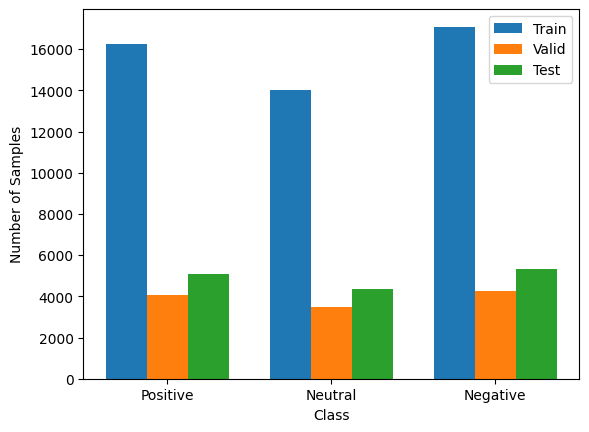

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

train_counts = pd.Series(y_train).value_counts().sort_index(ascending=True)
valid_counts = pd.Series(y_val).value_counts().sort_index(ascending=True)
test_counts = pd.Series(y_test).value_counts().sort_index(ascending=True)

train_samples = [train_counts[0], train_counts[1], train_counts[2]]  # Số mẫu của từng class trong tập train
valid_samples = [valid_counts[0], valid_counts[1], valid_counts[2]]  # Số mẫu của từng class trong tập valid
test_samples = [test_counts[0], test_counts[1], test_counts[2]]      # Số mẫu của từng clas trong tập test

# Số lượng class
num_classes = len(train_samples)

# Tạo các index cho các class
class_indices = np.arange(num_classes)

# Độ rộng của cột
bar_width = 0.25

# Vẽ biểu đồ
class_names = ['Positive', 'Neutral', 'Negative']
plt.bar(class_indices, train_samples, width=bar_width, label='Train')
plt.bar(class_indices + bar_width, valid_samples, width=bar_width, label='Valid')
plt.bar(class_indices + 2 * bar_width, test_samples, width=bar_width, label='Test')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(class_indices + bar_width, class_names)
plt.legend()
plt.show()

# Modeling

In [31]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    # Compute the labels from the normalized confusion matrix.
    labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## BERT

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 35.1 MB/s eta 0:00:00


### Data preparation

In [ ]:
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from tqdm.auto import tqdm
import numpy as np

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def generate_data(X, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(X)):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256,
            truncation=True,
            padding='max_length',
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
# Define the input shape
max_length = 256

X_train_input_ids = np.zeros((len(X_train), max_length))
X_train_attn_masks = np.zeros((len(X_train), max_length))
X_train_input_ids, X_train_attn_masks = generate_data(X_train, X_train_input_ids, X_train_attn_masks, tokenizer)

X_val_input_ids = np.zeros((len(X_val), max_length))
X_val_attn_masks = np.zeros((len(X_val), max_length))
X_val_input_ids, X_val_attn_masks = generate_data(X_val, X_val_input_ids, X_val_attn_masks, tokenizer)

X_test_input_ids = np.zeros((len(X_test), max_length))
X_test_attn_masks = np.zeros((len(X_test), max_length))
X_test_input_ids, X_test_attn_masks = generate_data(X_test, X_test_input_ids, X_test_attn_masks, tokenizer)

In [ ]:
# one-hot encoding
num_classes = len(np.unique(y_train))
y_train = np.eye(num_classes)[y_train]
y_val = np.eye(num_classes)[y_val]
y_test = np.eye(num_classes)[y_test]

In [ ]:
# creating a data pipeline using tensorflow dataset utility
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_input_ids, X_train_attn_masks, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_input_ids, X_val_attn_masks, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_input_ids, X_test_attn_masks, y_test))

In [ ]:
def SentimentDatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels

In [4]:
train_dataset = train_dataset.map(SentimentDatasetMapFunction) # converting to required format for tensorflow dataset
val_dataset = val_dataset.map(SentimentDatasetMapFunction)
test_dataset = test_dataset.map(SentimentDatasetMapFunction)

In [ ]:
batch_size = 16
train_dataset = train_dataset.shuffle(10000).batch(batch_size, drop_remainder=True)
train_dataset = train_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size, drop_remainder=True)
val_dataset = val_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size, drop_remainder=True)
test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

### Create and train model

In [ ]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)
model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
 dropout_19 (Dropout)        multiple                  0         
                                                                 
Total params: 66955779 (255.42 MB)
Trainable params: 66955779 (255.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# defining 2 input layers for input_ids and attn_masks
input_ids = tf.keras.layers.Input(shape=(max_length,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(max_length,), name='attention_mask', dtype='int32')

bert_embds = model.distilbert(input_ids, attention_mask=attn_masks)[0]
flatten = tf.keras.layers.Flatten()(bert_embds)
batch_normalize = tf.keras.layers.BatchNormalization()(flatten)
intermediate_layer = tf.keras.layers.Dense(64, activation='relu', name='intermediate_layer')(batch_normalize)
dropout_layer = tf.keras.layers.Dropout(0.2)(intermediate_layer)
output_layer = tf.keras.layers.Dense(3, activation='softmax', name='output_layer')(dropout_layer) # softmax -> calcs probs of classes

sentiment_model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
sentiment_model.get_layer('distilbert').trainable = False
sentiment_model.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 256)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 distilbert (TFDistilBertMa  TFBaseModelOutput(last_hid   6636288   ['input_ids[0][0]',           
 inLayer)                    den_state=(None, 256, 768)   0          'attention_mask[0][0]']      
                             , hidden_states=None, atte                                    

In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=1e-5, weight_decay=1e-6)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

sentiment_model.compile(optimizer=optim, loss=loss_func, metrics=[acc])
history = sentiment_model.fit(train_dataset, epochs=50, validation_data=val_dataset, callbacks=[early_stopping])

Epoch 1/50
1196/1196 [==============================] - 406s 244ms/step - loss: 1.4868 - accuracy: 0.4251 - val_loss: 0.9279 - val_accuracy: 0.7049
Epoch 2/50
1196/1196 [==============================] - 282s 231ms/step - loss: 0.7627 - accuracy: 0.7042 - val_loss: 0.7377 - val_accuracy: 0.7536
Epoch 3/50
1196/1196 [==============================] - 270s 224ms/step - loss: 0.3533 - accuracy: 0.8813 - val_loss: 0.6045 - val_accuracy: 0.7984
Epoch 4/50
1196/1196 [==============================] - 270s 233ms/step - loss: 0.1968 - accuracy: 0.9479 - val_loss: 0.5068 - val_accuracy: 0.8365
Epoch 5/50
1196/1196 [==============================] - 270s 213ms/step - loss: 0.1418 - accuracy: 0.9646 - val_loss: 0.4314 - val_accuracy: 0.8532
Epoch 6/50
1196/1196 [==============================] - 342s 289ms/step - loss: 0.0901 - accuracy: 0.9875 - val_loss: 0.3783 - val_accuracy: 0.8575
Epoch 7/50
1196/1196 [==============================] - 303s 245ms/step - loss: 0.0798 - accuracy: 0.9854 - val_

### Result

(0.0, 1.5603349999999998)

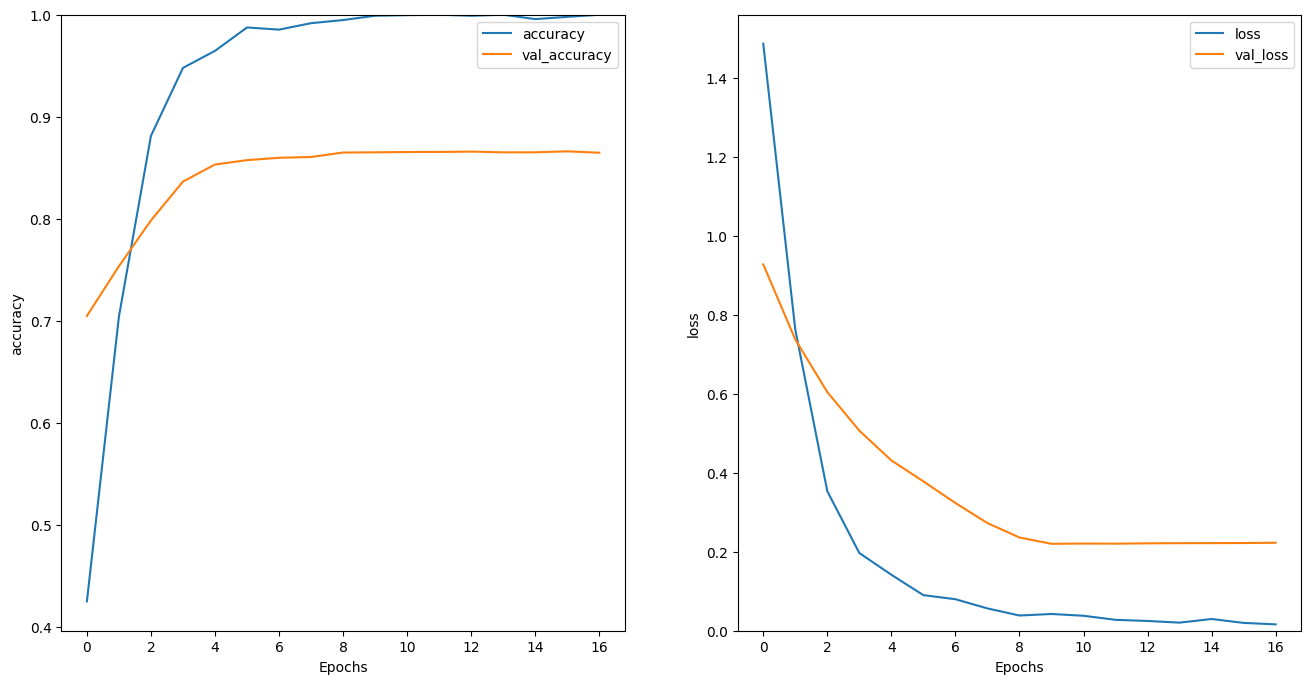

In [23]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
a = {'input_ids': X_test_input_ids, 'attention_mask': X_test_attn_masks}

In [29]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = sentiment_model.predict(a)
y_pred = np.argmax(y_pred, axis=1)

# Evaluate the classifier
print(classification_report(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     13400
           1       0.82      0.85      0.83     13994
           2       0.86      0.89      0.87     12998

    accuracy                           0.87     40392
   macro avg       0.85      0.89      0.87     40392
weighted avg       0.85      0.89      0.87     40392


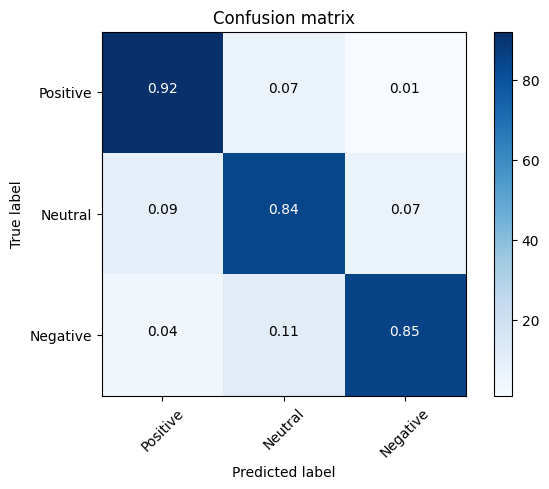

In [32]:
from sklearn.metrics import confusion_matrix

y_pred = sentiment_model.predict(a)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

plot_confusion_matrix(cm, class_names)